In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [4]:
cars = pd.read_csv("C:\\Users\\hp\\Desktop\\carsclean.csv")

In [5]:
cars.head()

,city,car_maker,model,year,condition,kilometers,transmission,fuel,color,pay_method,price
0,Al Riyadh,Toyota,Rush,2019,Used,14999.5,Automatic,Gasoline,White,Cash or Installments,58375.0
1,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,10000.0
2,Al Riyadh,Toyota,Camry,2014,Used,24999.5,Automatic,Gasoline,White,Installments Only,58375.0
3,Al Riyadh,Ford,Fusion,2010,Used,200000.0,Automatic,Gasoline,White,Cash Only,22425.4
4,Al Riyadh,Ford,Taurus,2018,Used,5000.0,Automatic,Gasoline,Grey,Cash Only,22425.4


In [6]:
cars.isnull().sum()

city            0
car_maker       0
model           0
year            0
condition       0
kilometers      0
transmission    0
fuel            0
color           0
pay_method      0
price           0
dtype: int64

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          560 non-null    object 
 1   car_maker     560 non-null    object 
 2   model         560 non-null    object 
 3   year          560 non-null    int64  
 4   condition     560 non-null    object 
 5   kilometers    560 non-null    float64
 6   transmission  560 non-null    object 
 7   fuel          560 non-null    object 
 8   color         560 non-null    object 
 9   pay_method    560 non-null    object 
 10  price         560 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 48.2+ KB


In [8]:
print(cars.describe())

              year     kilometers          price
count   560.000000     560.000000     560.000000
mean   2011.857143  120535.482143   37521.064286
std       3.892236   81305.837563   27022.610673
min    2006.000000       0.000000    2114.000000
25%    2008.000000   39999.500000   19000.000000
50%    2012.500000  149999.500000   27500.000000
75%    2014.250000  200000.000000   58375.000000
max    2019.000000  200000.000000  100000.000000


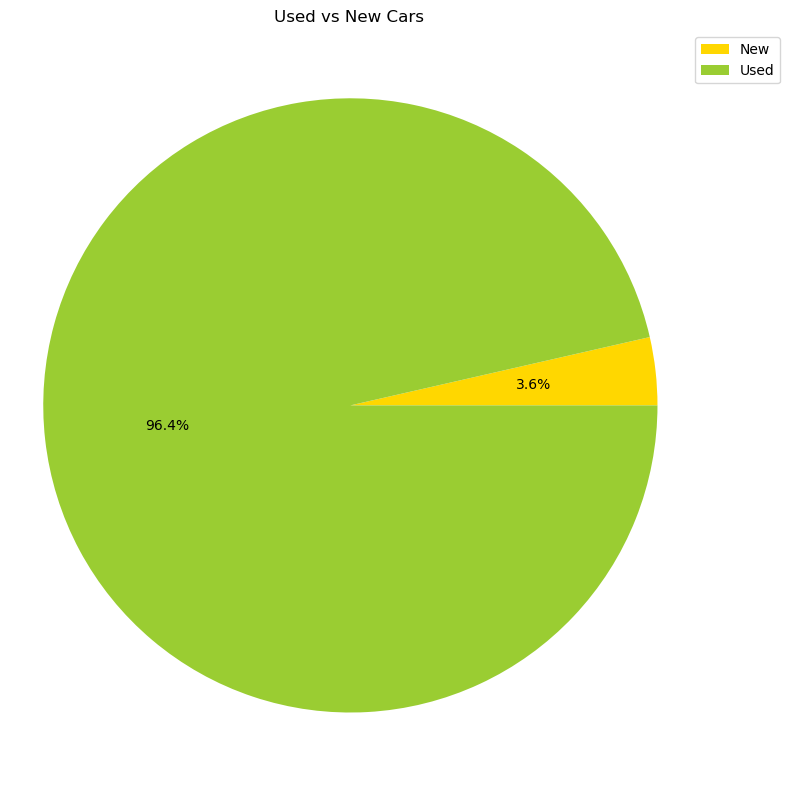

In [22]:
car_condition_counts = cars.groupby('condition')['condition'].count().reset_index(name='count')

fig, ax = plt.subplots(figsize=(8, 8))

labels = car_condition_counts['condition']
sizes = car_condition_counts['count']
colors = ['gold', 'yellowgreen']

wedges, texts, autotexts = ax.pie(sizes, colors=colors, autopct='%1.1f%%')

ax.legend(wedges, labels, loc="upper left", bbox_to_anchor=(1, 1))
ax.axis('equal')  
ax.set_title('Used vs New Cars')
plt.tight_layout()

In [17]:
car_counts = cars.groupby(['car_maker', 'model', 'year', 'condition']).size().reset_index(name='count')

top_cars = car_counts.sort_values('count', ascending=False).head(5)

print("Top 5 Car Makes, Models, Years, and Conditions:")
for index, row in top_cars.iterrows():
    print(f"- {row['car_maker']} {row['model']} ({row['year']}, {row['condition']}): {row['count']} listings")

Top 5 Car Makes, Models, Years, and Conditions:
- BMW 740 (2007, Used): 40 listings
- BMW 730 (2014, Used): 20 listings
- Kia Rio (2015, Used): 20 listings
- Toyota Rush (2019, Used): 20 listings
- Toyota Prado (2008, Used): 20 listings


In [18]:
car_counts = cars.groupby(['car_maker', 'model', 'year', 'condition']).size().reset_index(name='count')

least_popular_cars = car_counts.sort_values('count').head(5)

print("5 Least Popular Car Makes, Models, and Years:")
for index, row in least_popular_cars.iterrows():
    print(f"- {row['car_maker']} {row['model']} ({row['year']}, {row['condition']}): {row['count']} listings")

5 Least Popular Car Makes, Models, and Years:
- BMW 730 (2014, Used): 20 listings
- Toyota Prado (2008, Used): 20 listings
- Toyota Fortuner (2016, Used): 20 listings
- Toyota Camry (2019, New): 20 listings
- Toyota Camry (2014, Used): 20 listings


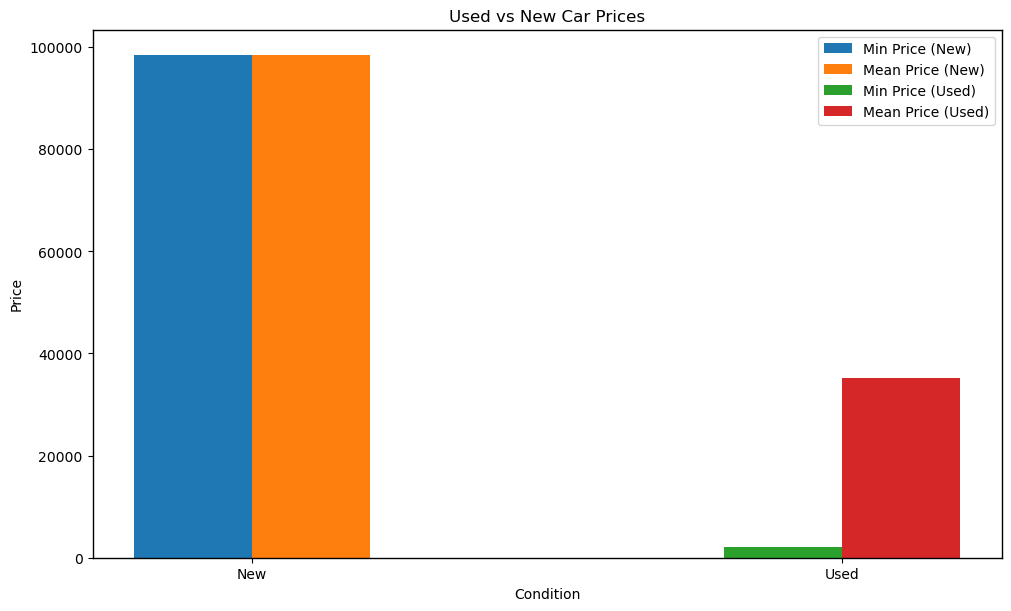

In [146]:
price_stats = cars.groupby('condition')['price'].agg(['min', 'max', 'mean']).reset_index()

plt.figure(figsize=(10, 6))

bar_width = 0.2
x = range(len(price_stats['condition']))
labels = price_stats['condition']

for i, condition in enumerate(price_stats['condition']):
    plt.bar(x[i] - bar_width/2, price_stats.loc[price_stats['condition'] == condition, 'min'], bar_width, label=f'Min Price ({condition})')
    plt.bar(x[i] + bar_width/2, price_stats.loc[price_stats['condition'] == condition, 'mean'], bar_width, label=f'Mean Price ({condition})')

plt.xticks(x, labels)
plt.xlabel('Condition')
plt.ylabel('Price')
plt.title('Used vs New Car Prices')
plt.legend()

plt.show()

<Figure size 1200x800 with 0 Axes>

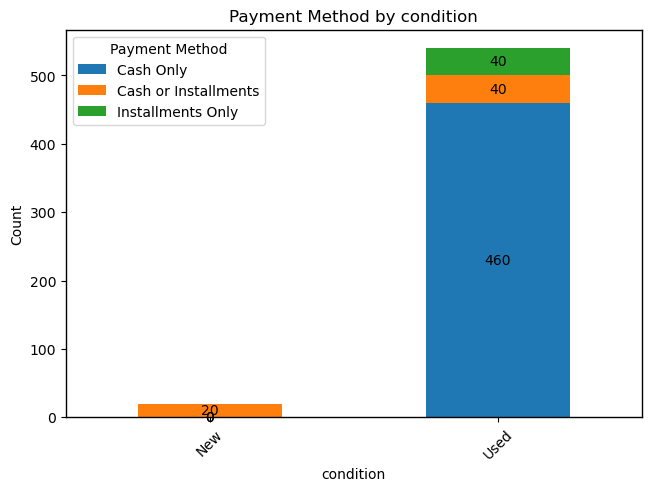

In [152]:
pay_method_by_age = pd.crosstab(cars['condition'], cars['pay_method'])

plt.figure(figsize=(12, 8))
ax = pay_method_by_age.plot(kind='bar', stacked=True)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, f"{height:.0f}", ha='center', va='center')

plt.title('Payment Method by condition')
plt.xlabel('condition')
plt.ylabel('Count')
plt.legend(title='Payment Method')
plt.xticks(rotation=45)
plt.show()

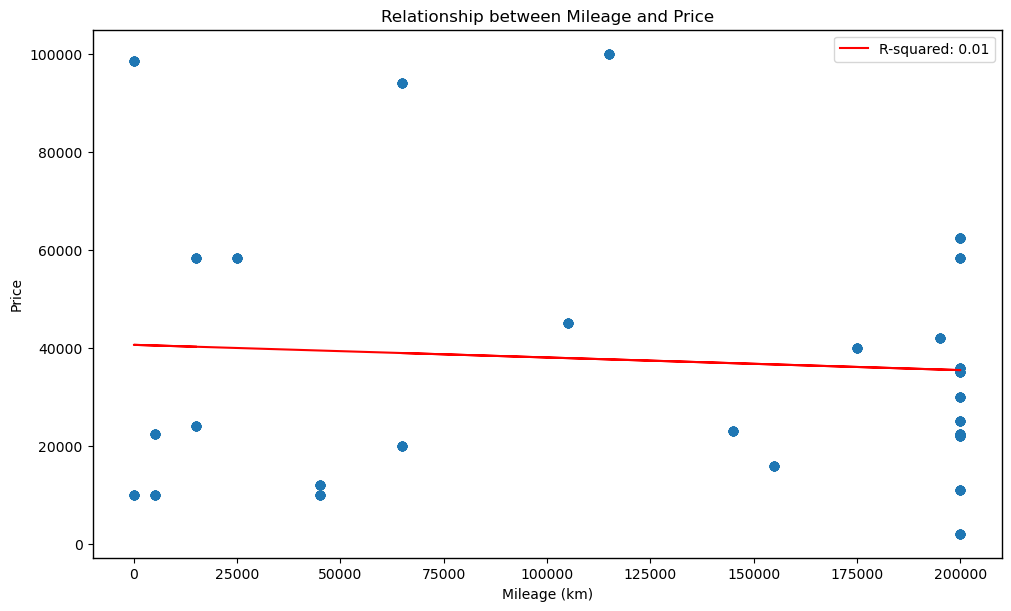

In [147]:
plt.figure(figsize=(10, 6))
plt.scatter(cars['kilometers'], cars['price'], alpha=0.5)

plt.xlabel('Mileage (km)')
plt.ylabel('Price')
plt.title('Relationship between Mileage and Price')

from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(cars['kilometers'], cars['price'])
plt.plot(cars['kilometers'], intercept + slope*cars['kilometers'], 'r', label=f'R-squared: {r_value**2:.2f}')
plt.legend()

plt.show()

<Figure size 1000x600 with 0 Axes>

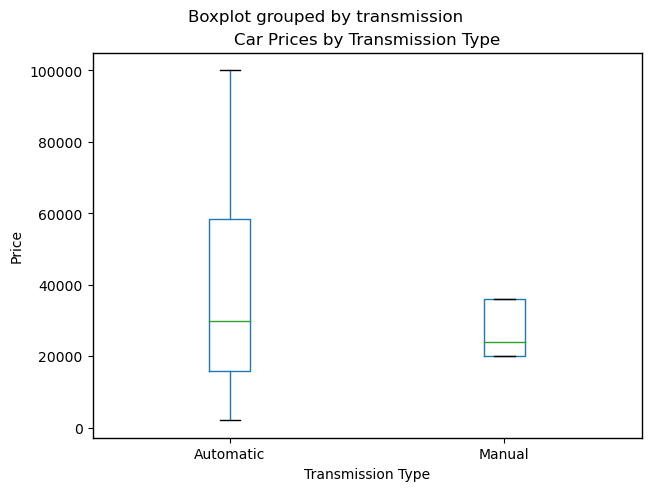

In [148]:
plt.figure(figsize=(10, 6))
cars.boxplot(column='price', by='transmission', grid=False)

plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.title('Car Prices by Transmission Type')

plt.show()

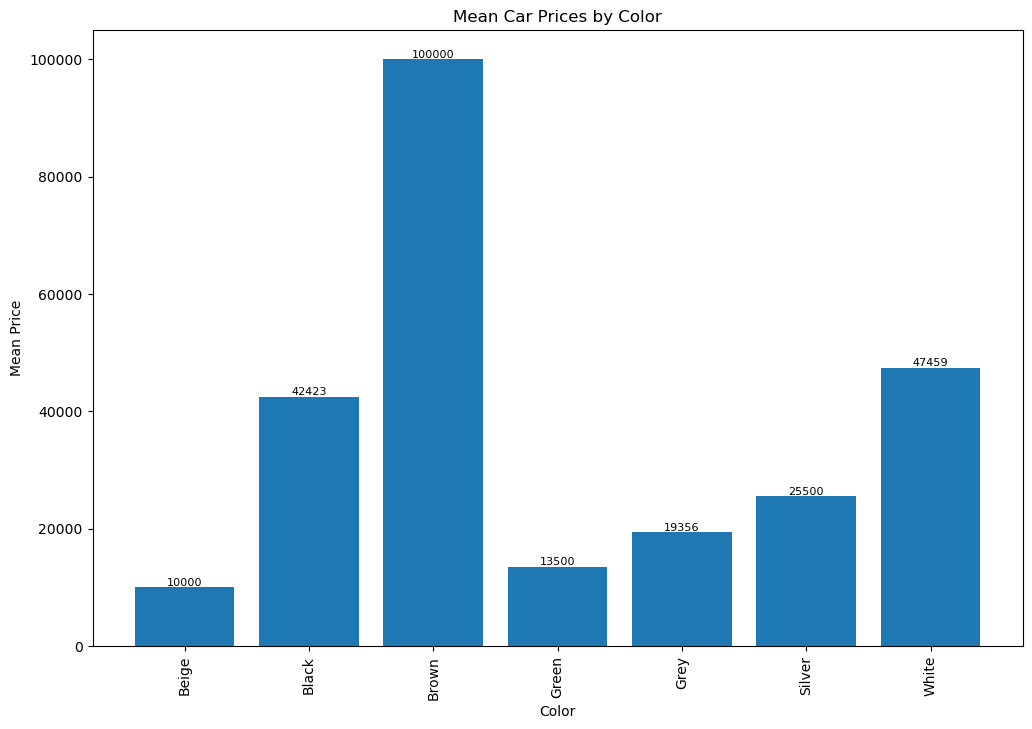

In [19]:
color_prices = cars.groupby('color')['price'].mean().reset_index()

plt.figure(figsize=(12, 8))
plt.bar(color_prices['color'], color_prices['price'])

for i, v in enumerate(color_prices['price']):
    plt.text(i, v, str(round(v)), color='black', ha='center', va='bottom', fontsize=8)

plt.xlabel('Color')
plt.ylabel('Mean Price')
plt.title('Mean Car Prices by Color')
plt.xticks(rotation=90)

plt.show()

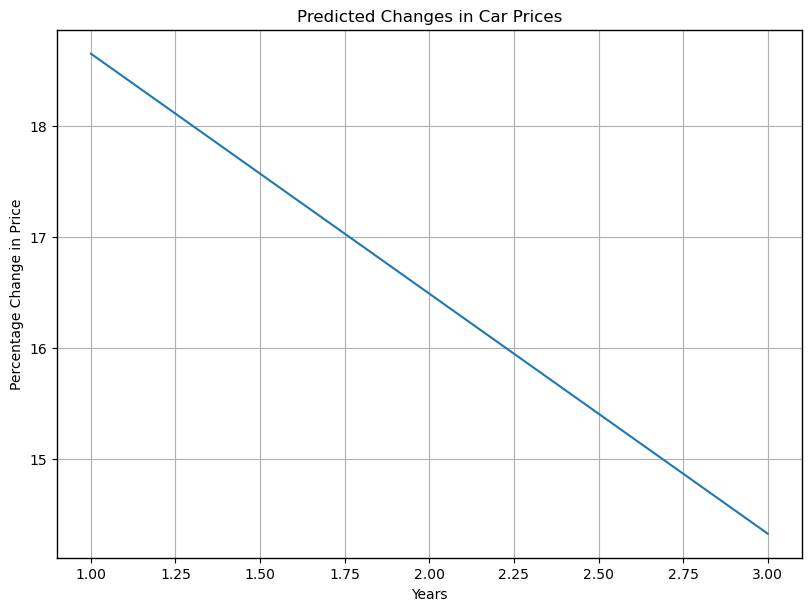

In [153]:
cars['age'] = 2024 - cars['year']
cars['is_new'] = (cars['condition'] == 'New').astype(int)

# Train the model
X = cars[['age', 'is_new']]
y = cars['price']
model = LinearRegression()
model.fit(X, y)

# Make predictions for the next 3 years
future_years = [1, 2, 3]
future_data = pd.DataFrame({'age': future_years, 'is_new': [0, 0, 0]})
future_prices = model.predict(future_data)

# Calculate the percentage
base_price = cars['price'].mean()
future_price_changes = [(p - base_price) / base_price * 100 for p in future_prices]

# results
plt.figure(figsize=(8, 6))
plt.plot(future_years, future_price_changes)
plt.xlabel('Years')
plt.ylabel('Percentage Change in Price')
plt.title('Predicted Changes in Car Prices')
plt.grid()
plt.show()